# Sentiment Analysis Classification in Darija


#### <font> Réalisé par: BOUYAKHSAINE Khadija 

Généralement  l’analyse de sentiment peut être appliqué à n’importe quelle industrie et à la technologie pour comprendre les opinions des clients afin d’améliorer les services de l’entreprise.

Dans notre cas l’objectif est d’analyser les sentiments des avis des publié dans les réseaux sociaux, en dialectique arabe en utilisant  un jeu de données contient des commentaires en dialectique arabe marocaine pendant le confinement covide 19, principalement il contient deux colonnes :   comment  et label


## Dataset

In [64]:
import  numpy as np
import pandas as pd

train = pd.read_excel("Final_Data.xlsx" )
train

,comment,label
0,العتماني عندو اللباقة و الجدال بالغة سد فمك,0
1,إن كتب لنا الموت بهذا الفيروس فذاك يبقى قضاء و...,0
2,خوتي الله ينجيكم من هاد الفيروس الخبيث يا رب ا...,0
3,الحمد لله على أن ڤيروس كورونا لا يعيش في ما فو...,0
4,و بخصوص الكمامات فهو على صواب الكمامة تحمي فقط...,0
...,...,...
4332,هاد الصداع كامل السبب ديالوا كروش الحرام اللي ...,1
4333,هادشي بزاف ياك حبستونا شهرين بلا خدمة مرض كيتص...,1
4334,واحد التمساح عدنا ماعندوا نفس,1
4335,وكلنا عليهم الله هاد المصانع غادي يخليونا فديو...,1


In [2]:
DATA_COLUMN = "comment"
LABEL_COLUMN = "label"

In [3]:
df_MSAC = pd.DataFrame(train, columns=["comment", LABEL_COLUMN])
print(df_MSAC["label"].value_counts())

1    2899
0    1438
Name: label, dtype: int64


In [4]:
df_MSAC["comment"][225]

'Asi hotman positive dima 😂'

## Pretraitement

#### Transformation Aransia en dialectique : 

Translittérer d’une langue ou d’un dialecte è un autre :    Nous avons utilisé le module Aaransia pour transformer les commentaires de la langue francais en langue  dialectique arabe 


In [5]:
from aaransia import transliterate, SourceLanguageError
import warnings
warnings.simplefilter('ignore')
for i in range(len(df_MSAC)):
    row=df_MSAC.iloc[i]["comment"]
    row=transliterate(row, source='ma', target='ar', universal=True)
    df_MSAC.loc[:,"comment"][i]=row

In [6]:
df_MSAC["comment"][225]

'اسي هوتمان پوسيتيڤ ديما 😂'

### Normalisation

In [7]:
#Normalize_the_text:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [8]:
import re
sentences = [normalize_arabic(text) for text in df_MSAC['comment'] ]
df_MSAC['comment']=sentences

### Nettoyage des données
Dans la phase de nettoyage de données nous avons effectué  de nombreux traitements sur notre jeu de données à savoir :

•La suppression de la ponctuation

•La suppression des chiffres 

•La suppression des stop words

Pour la suppression des chiffres et de  ponctuation nous avons exploité  le module **re** qui permet d'utiliser des expressions régulières.

In [9]:
import re
df_MSAC['comment'] = df_MSAC['comment'].str.replace('\d+', ' ')

df_MSAC['comment'] = df_MSAC['comment'].str.replace('\n', ' ')
df_MSAC['comment'] = df_MSAC['comment'].str.replace('/', ' ')
#removes punctuation
df_MSAC['comment']= [re.sub(r'[^\w\s]','',s) for s in df_MSAC['comment']] 
df_MSAC['comment'][12]

' الشفافيه و الثقه  لا بد ان تكون الثقه'

### Stop word

Les Stop words ou bien  les mots vides sont les mots couramment utilisés qui sont généralement ignorés par le moteur de recherche, tels que the, اللذين, إن, etc. Ces mots sont supprimés pour économiser de l’espace dans la base de données et le temps de traitement, c’est pour cette raison qu’on va essayer dans l’étape suivante d’utiliser le package ntlk pour supprimer ces mots vides.

Le package **stop-words** est utilisé pour supprimer les mots vides du texte en Python. Ce paquet contient des mots vides dans de nombreuses langues comme l’anglais, l’Arabe, le français, l’espagnol et plus encore.


In [10]:
##Common Words

In [11]:
# import necessary libraries
from nltk.corpus import stopwords

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [14]:
df_MSAC['comment'][12]

' الشفافيه و الثقه  لا بد ان تكون الثقه'

In [15]:
import nltk
stopwords = list(set(nltk.corpus.stopwords.words('arabic')))
df_MSAC["comment"] = df_MSAC["comment"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

## Stemming

La méthode  stemming est le processus de suppression d'une partie d'un mot ou de réduction d'un mot à sa racine pour avoir des données utiles pour l’analyse des sentiments.
Dans notre cas nous avons utilisé dans la partie de stemming , Tashaphyne qui est un stemmer et un segmenteur de lumière arabe. Il supporte principalement le stemming léger (en supprimant les préfixes et les suffixes) et donne toutes les segmentations possibles. Il utilise un automate à états finis modifié qui permet de générer toutes les segmentations


In [16]:
pip install tashaphyne

Note: you may need to restart the kernel to use updated packages.


In [17]:
from tashaphyne.stemming import ArabicLightStemmer
#Stemmer_LIGHT : Remove suffixes and affixes 
ArListem = ArabicLightStemmer()
def stemmer_light(text):
    text_words = []
    words = text.split(" ")
    for c in words:
        stem = ArListem.light_stem(c)
        text_words.append(stem)
    return ' '.join(text_words)

#Root Stemming :  Transform the wrod into its root form
def stemmer_root(text):
    text_words = []
    words = text.split(" ")
    for c in words:
        stem = ArListem.light_stem(c)
        text_words.append(stem)
    return ' '.join(text_words)

In [18]:
sentences = [stemmer_light(text) for text in df_MSAC['comment']]

In [19]:
df_MSAC['comment']=sentences
df_MSAC['comment'][12]

'شفافيه ثقه بد ان كو ثقه'

In [20]:
#we need to create a document term matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in  vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [21]:
#We inspect the top word in a sample from our corpus without stemming the words
from pprint import pprint
topWords=get_top_n_words(df_MSAC['comment'],n=20)
pprint(topWords)

[('له', 1358),
 ('عل', 1220),
 ('ان', 913),
 ('حال', 791),
 ('لا', 646),
 ('عد', 574),
 ('را', 571),
 ('ناس', 569),
 ('هاد', 501),
 ('اش', 473),
 ('حمد', 450),
 ('مغرب', 428),
 ('ديال', 398),
 ('صح', 381),
 ('حجر', 381),
 ('حت', 377),
 ('سب', 338),
 ('نا', 332),
 ('على', 320),
 ('مرض', 296)]


## Word Cloud


Nous avons généré ensuite les WordClouds (nuages de mots-clés en français) qui sont des outils utiles pour synthétiser les notions les plus importantes d’un texte, Plus un mot est présent dans le texte pris en considération, plus il apparaît en gros dans le wordcloud.

In [22]:
!pip install --upgrade arabic-reshaper
!pip install python-bidi

Requirement already up-to-date: arabic-reshaper in c:\users\dell\anaconda3\lib\site-packages (2.1.3)


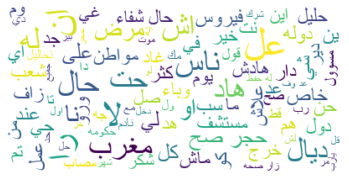

In [23]:
import nltk
#nltk.download('stopwords')
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#stopwords= pd.read_excel("stop_words_Arabic.xlsx")
arab_stopwords = list(set(nltk.corpus.stopwords.words("arabic")))
sample_corpus=' '.join(df_MSAC['comment'])
data = arabic_reshaper.reshape(sample_corpus)
data = get_display(data) # add this  
wordcloud = WordCloud(font_path = 'arial.ttf',stopwords = arab_stopwords, background_color = "white", max_font_size = 50, max_words = 100).generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analyis classifier

## Creating training dataset for the classifier


In [24]:
import pandas as pd
import numpy as np

from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
all_datasets= []

In [25]:
print(df_MSAC[LABEL_COLUMN].value_counts())
label_list_MSAC = list(df_MSAC[LABEL_COLUMN].unique())

1    2899
0    1438
Name: label, dtype: int64


In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(df_MSAC[DATA_COLUMN])
vocab_size = len(vectorizer.vocabulary_)
print(f'Il y a {vocab_size} mots différents dans notre corpus.')

Il y a 11031 mots différents dans notre corpus.


## Tokenization

On fait le **Tokenization** qui est le processus de décomposition d'un  texte donné dans NLP en petite unité d'une phrase appelée jeton

In [27]:
from nltk.tokenize import word_tokenize
tokenizedWords = []
documents = []
# chaque document contient tuple==> la liste de mot et categorie
for i in df_MSAC.index:
    sentiment =df_MSAC["label"][i]
    review = df_MSAC["comment"][i]
    tokenizedWord = word_tokenize(review)
    document = [tokenizedWord, sentiment]
    documents.append(document)

chaque element de documents contient une liste=[contient tous les mots de document, son categorie ]


In [28]:
len(documents)

4337

In [29]:
df_MSAC["comment"][4]

'خصوص كمام هو عل صواب كمامه حم قط مريض'

chaque élément de documents contient une liste qui contient tous les mots présents dans ce document et son catégorie (sentiment soit 0 ou bien 1) comme par exemple ce commentaire 

In [30]:
documents[4]

[['خصوص', 'كمام', 'هو', 'عل', 'صواب', 'كمامه', 'حم', 'قط', 'مريض'], 0]

### liste all word

In [31]:
listeall=[]
for i in df_MSAC["comment"]:
    review = i
    tokenizedWord = word_tokenize(review)
    for j in tokenizedWord:
        listeall.append(j)
print(len(listeall))

70336


- listeall est une liste qui contient tous les mots de tous les documents , qu'on va utiliser par la suite dans la partie de bag of word 

### Bag of word

le bag of word  qui est une représentation qui transforme un texte arbitraire en vecteurs de longueur fixe en comptant le nombre de fois où chaque mot apparaît. Ce processus est souvent appelé vectorisation. 

In [32]:
# Define the feature extractor
# permet de calculer la frequence de chaque mot dans le documen
all_words = nltk.FreqDist(w.lower() for w in listeall)
word_features = list(all_words)[:2000]
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features


In [63]:
#all_words.items()

In [34]:
df_fdist = pd.DataFrame.from_dict(all_words, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
print(df_fdist)

           Frequency
Term                
عتمان             13
عند              245
باقه               1
جدال               1
غه                 9
...              ...
صبفط               1
مقبلتونيش          1
عيشي               1
تمساح              1
ماعندو             1

[11036 rows x 1 columns]


In [35]:

featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]

In [36]:
# Train Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [37]:
# Test the classifier
print(nltk.classify.accuracy(classifier, test_set))

0.54


In [38]:
classifier.classify(test_set[0][0])

1

## Matrice de confusion 

In [39]:
test_result = []
gold_result = []

for i in range(len(test_set)):
    test_result.append(classifier.classify(test_set[i][0]))
    gold_result.append(test_set[i][1])

In [40]:
CM = nltk.ConfusionMatrix(gold_result, test_result)
print(CM)

  |  0  1 |
--+-------+
0 |<53>46 |
1 |  . <1>|
--+-------+
(row = reference; col = test)



Alors notre modèle a bien classé 45 commentaires de test de classe 0 négative et 34 commentaires de classe 1 positive avec un erreur en 19 commentaires prédites dans la classe 1 mais en réalité sont de classe 0.

In [41]:
# voir quelles fonctionnalités  les plus informatives que classificateur naive Bayes a trouvé 
classifier.show_most_informative_features(5)

Most Informative Features
         contains(حمدله) = True                0 : 1      =     42.0 : 1.0
           contains(حمد) = True                0 : 1      =     36.2 : 1.0
          contains(جلال) = True                0 : 1      =     20.9 : 1.0
           contains(اذن) = True                0 : 1      =     19.5 : 1.0
          contains(قدير) = True                0 : 1      =     18.6 : 1.0


la fonction show_most_informative_features() permet d'afficher les caractéristique  plus informatives que classificateur naive Bayes a trouvé pour chaque classe par exemple: ce resultat: **contains(قدير) = True  1 : 0   =  18.6 : 1.0**  signifier que le mot قدير negative(0) 18.6 fois qu'il est positive(1). 

**max(Pr(feature |classLabel))/min(Pr(feature | classLabel))**

## CountVectorizer 

On peut également utiliser la classe CountVectorizer de sklearn.feature_extraction.text. qui permet de Convertir une collection de documents texte en une matrice de nombres de jetons (mot).

On va définir un nombre maximum de fonctionnalités (nombre max de fonctionnalités qui aident le plus via l'attribut "max_features"). puis on va faire l'apprentissage sur le corpus ensuiteon va  appliquer la même transformation au corpus ".fit_transform(corpus)" et finalement on va le convertir en un tableau.

In [42]:
# Modèle naive_bayes
import nltk
import random
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score

vectorizer = CountVectorizer(max_features=3000)
X = df_MSAC["comment"]
y = df_MSAC["label"]

# Séparation des données en 2 parties : entraînement / test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42)
 
train_X = vectorizer.fit_transform(train_X) 
test_X = vectorizer.transform(test_X)
# Entraînement du modèle
mnb = MultinomialNB()
mnb.fit(train_X, train_y)

# Test the classifier
predictions = mnb.predict(test_X)
score_NVB=accuracy_score(test_y, predictions) * 100
precision_NVB= precision_score(test_y, predictions) * 100
recall_NVB= recall_score(test_y, predictions) * 100
print('Score (=accuracy) du modèle  sur le jeu de test : ', round(accuracy_score(test_y, predictions) * 100, 2), '%')


Score (=accuracy) du modèle  sur le jeu de test :  83.13 %


In [43]:
from sklearn.metrics import classification_report
report = classification_report(test_y, predictions)
print(report) 

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       394
           1       0.83      0.93      0.88       691

    accuracy                           0.83      1085
   macro avg       0.83      0.79      0.81      1085
weighted avg       0.83      0.83      0.83      1085



### Model naive bayes avec n-grame

En général, le modèle du bag of words est une approche très simple de la vectorisation des mots et présente certaines limites. Généralement, les mots ne sont pas ordonnés au fur et à mesure qu'ils sont collectés, de sorte qu'une grande partie du contexte du texte est perdue.    L'utilisation de n-grammes, dans ce cas, peut aider à résoudre ce problème en établissant un certain ordre pour préserver le contexte

 en cherche à la meilleure valeur de n gram qui donne de bon résultat :

In [44]:
for N in range(1,10):
    vectorizer_G = CountVectorizer(max_features=3000, ngram_range=(1,N))

    X = df_MSAC["comment"]
    y = df_MSAC["label"]

    # Séparation des données en 2 parties : entraînement / test
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42)
 
    train_X = vectorizer_G.fit_transform(train_X) 
    test_X = vectorizer_G.transform(test_X)
    # Entraînement du modèle
    mnb = MultinomialNB()
    mnb.fit(train_X, train_y)
    # Test the classifier
    predictions_2G = mnb.predict(test_X)
    print('Score (=accuracy) du modèle avec {} gramme: '.format(N), round(accuracy_score(test_y, predictions_2G) * 100, 2), '%')

Score (=accuracy) du modèle avec 1 gramme:  83.13 %
Score (=accuracy) du modèle avec 2 gramme:  82.86 %
Score (=accuracy) du modèle avec 3 gramme:  83.23 %
Score (=accuracy) du modèle avec 4 gramme:  83.41 %
Score (=accuracy) du modèle avec 5 gramme:  83.13 %
Score (=accuracy) du modèle avec 6 gramme:  83.13 %
Score (=accuracy) du modèle avec 7 gramme:  83.04 %
Score (=accuracy) du modèle avec 8 gramme:  83.04 %
Score (=accuracy) du modèle avec 9 gramme:  83.04 %


dans ce cas on obtient bon résultat lorsque on entraîne le modèle avec des 4-grammes. 

In [45]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score


vectorizer_3G = CountVectorizer(max_features=3000, ngram_range=(1,4))

X = df_MSAC["comment"]
y = df_MSAC["label"]

# Séparation des données en 2 parties : entraînement / test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42)
 
train_X = vectorizer_3G.fit_transform(train_X) 
test_X = vectorizer_3G.transform(test_X)
# Entraînement du modèle
mnb_4G = MultinomialNB()
mnb_4G.fit(train_X, train_y)

# Test the classifier
predictions_3G = mnb_4G.predict(test_X)
score_NVB_3G=accuracy_score(test_y, predictions_3G) * 100
precision_NVB_3G= precision_score(test_y, predictions_3G) * 100
recall_NVB_3G= recall_score(test_y, predictions_3G) * 100
print('Score (=accuracy) du modèle  sur le jeu de test : ', round(accuracy_score(test_y, predictions_3G) * 100, 2), '%')


Score (=accuracy) du modèle  sur le jeu de test :  83.41 %


In [46]:
# Modèle decision tree
from sklearn.tree import DecisionTreeClassifier

# Vectorisation des critiques
vectorizer = CountVectorizer(max_features=3000)


# Séparation des données en 2 parties : entraînement / test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42)
 
train_X = vectorizer.fit_transform(train_X) 
test_X = vectorizer.transform(test_X)

# Entraînement du modèle
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree = decision_tree.fit(train_X, train_y)
predictions_tree = decision_tree.predict(test_X)
score_DT=accuracy_score(test_y, predictions_tree) * 100
precision_DT= precision_score(test_y, predictions_tree) * 100
recall_DT= recall_score(test_y, predictions_tree) * 100
print('Score (=accuracy) du modèle decision_tree avec CountVectorizer sur le jeu de test : ', round(accuracy_score(test_y, predictions_tree) * 100, 2), '%')

Score (=accuracy) du modèle decision_tree avec CountVectorizer sur le jeu de test :  77.05 %


In [47]:
from sklearn.metrics import classification_report
report = classification_report(test_y, predictions)
print(report) 

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       394
           1       0.83      0.93      0.88       691

    accuracy                           0.83      1085
   macro avg       0.83      0.79      0.81      1085
weighted avg       0.83      0.83      0.83      1085



In [48]:
from sklearn.ensemble  import RandomForestClassifier

# Vectorisation des critiques
vectorizer = CountVectorizer(max_features=4000)


# Séparation des données en 2 parties : entraînement / test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42)
 
train_X = vectorizer.fit_transform(train_X) 
test_X = vectorizer.transform(test_X)

# Entraînement du modèle
rf = RandomForestClassifier(max_depth=None, random_state=32,n_estimators=1000)
rf = rf.fit(train_X, train_y)
predictions = rf.predict(test_X)
score_RF=accuracy_score(test_y, predictions) * 100
precision_RF= precision_score(test_y, predictions) * 100
recall_RF= recall_score(test_y, predictions) * 100
print('Score (=accuracy) du modèle decision_tree avec CountVectorizer sur le jeu de test : ', round(accuracy_score(test_y, predictions) * 100, 2), '%')

Score (=accuracy) du modèle decision_tree avec CountVectorizer sur le jeu de test :  82.86 %


In [49]:
from sklearn.metrics import classification_report
report = classification_report(test_y, predictions)
print(report)  

              precision    recall  f1-score   support

           0       0.87      0.62      0.72       394
           1       0.81      0.95      0.88       691

    accuracy                           0.83      1085
   macro avg       0.84      0.78      0.80      1085
weighted avg       0.83      0.83      0.82      1085



### Model naive bayes avec TfidfVectorizer

In [50]:
# Modèle3 naive_bayes
import nltk
import random
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_TFIDF = TfidfVectorizer(max_features=3000)
# Séparation des données en 2 parties : entraînement / test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42)
 
train_X = vectorizer_TFIDF.fit_transform(train_X) 
test_X = vectorizer_TFIDF.transform(test_X)

# Entraînement du modèle
mnb_tf = MultinomialNB()
mnb_tf.fit(train_X, train_y)

# Test the classifier
predictions_TF = mnb_tf.predict(test_X)
score_NVB_TF=accuracy_score(test_y, predictions_TF) * 100
precision_NVB_TF= precision_score(test_y, predictions_TF) * 100
recall_NVB_TF= recall_score(test_y, predictions_TF) * 100
print('Score (=accuracy) du modèle  sur le jeu de test : ', round(accuracy_score(test_y, predictions_TF) * 100, 2), '%')


Score (=accuracy) du modèle  sur le jeu de test :  81.47 %


In [51]:
# Modèle3 naive_bayes
import nltk
import random
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_TFIDF = TfidfVectorizer(max_features=3000, ngram_range=(1,4))


# Séparation des données en 2 parties : entraînement / test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42)
 
train_X = vectorizer_TFIDF.fit_transform(train_X) 
test_X = vectorizer_TFIDF.transform(test_X)

# Entraînement du modèle
mnbtfG = MultinomialNB()
mnbtfG.fit(train_X, train_y)

# Test the classifier
predictions_TF_G = mnbtfG.predict(test_X)
score_NVB_TF_G=accuracy_score(test_y, predictions_TF_G) * 100
precision_NVB_TF_G= precision_score(test_y, predictions_TF_G) * 100
recall_NVB_TF_G= recall_score(test_y, predictions_TF_G) * 100
print('Score (=accuracy) du modèle  sur le jeu de test : ', round(accuracy_score(test_y, predictions_TF_G) * 100, 2), '%')


Score (=accuracy) du modèle  sur le jeu de test :  82.95 %


### SVM

In [52]:
#modéle SVM
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Modèle 1
df_MSAC.columns = [DATA_COLUMN, LABEL_COLUMN]

#train_MSAC, test_MSAC = train_test_split(df_MSAC, test_size=0.2, random_state=42)

# Vectorisation des critiques
vectorizer = CountVectorizer(max_features=256)
X = vectorizer.fit_transform(df_MSAC[DATA_COLUMN])
y = df_MSAC[LABEL_COLUMN]

train_X, val_X, train_y, val_y = train_test_split(X, y,  test_size=0.2,random_state=42)
lin_clf = svm.LinearSVC()
lin_cl=lin_clf.fit(train_X, train_y)
predictions = lin_cl.predict(val_X)
#score_svm=accuracy_score( predictions , test_y) * 100
#precision_svm= precision_score( predictions , test_y) * 100
#recall_svm= recall_score(predictions , test_y) * 100
print('Score (=accuracy) du modèle svm  sur le jeu de test : ', round(accuracy_score(predictions,val_y) * 100, 2), '%')

Score (=accuracy) du modèle svm  sur le jeu de test :  79.38 %


#### Comparaison des résultat:

In [53]:
import pandas as pd
import numpy as np
pd= pd.DataFrame(np.array([[score_NVB,precision_NVB,recall_NVB],[score_DT,precision_DT,recall_DT],[score_RF,precision_RF,recall_RF]]),
                columns=['accuracy', 'precision','recall_score'], index=['Naive Bayes', 'Decision Tree ','Random Forest'])
pd 

,accuracy,precision,recall_score
Naive Bayes,83.133641,82.731959,92.908828
Decision Tree,77.050691,81.126761,83.357453
Random Forest,82.857143,81.444583,94.645441


In [54]:
import pandas as pd
import numpy as np
pd= pd.DataFrame(np.array([[score_NVB,precision_NVB,recall_NVB],[score_NVB_3G,precision_NVB_3G,recall_NVB_3G],[score_NVB_TF,precision_NVB_TF,recall_NVB_TF],[score_NVB_TF_G,precision_NVB_TF_G,recall_NVB_TF_G]]),
                columns=['accuracy', 'precision','recall_score'], index=['Naive Bayes avec CountVectorizer 1_gram', 'Naive Bayes avec CountVectorizer 4_gram ','Naive Bayes avec TfidfVectorizer 1_gram','Naive Bayes avec TfidfVectorizer 4_gram'])
pd 

,accuracy,precision,recall_score
Naive Bayes avec CountVectorizer 1_gram,83.133641,82.731959,92.908828
Naive Bayes avec CountVectorizer 4_gram,83.410138,82.967742,93.053546
Naive Bayes avec TfidfVectorizer 1_gram,81.474654,77.968037,98.842258
Naive Bayes avec TfidfVectorizer 4_gram,82.949309,79.487179,98.697540


Alors dans ce cas la meilleure méthode pour extraire les caractéristiques  du texte  est CountVectorizer avec 4-gram (séquences de 4 mots).

### Enregistrement de modèle:

In [55]:
import pickle, warnings
filename="review_model_NVB.pkl"
file = open(filename,"wb")
pickle.dump(mnb_4G,file)
file.close()

In [3]:
import pickle, warnings
fl = open("review_model_NVB.pkl","rb")
c = pickle.load(fl)
c

MultinomialNB()

In [4]:
countvector = "review_cv.pkl"
cfile = open(countvector,"wb")
pickle.dump(vectorizer,cfile)
file.close()

NameError: name 'vectorizer' is not defined

In [5]:
cfl = open("review_cv.pkl","rb")
cv=pickle.load(cfl)
cv

EOFError: Ran out of input

In [59]:
import tkinter 
from tkinter import messagebox

In [ ]:
from  tkinter import *
main = Tk()
def get_pred():
    rv = lb.get("1.0",END)
    tst = cv.transform([rv])
    rs = c.predict(tst)
    label ={0:"Negative 😞",1:"Positive 😊"}
    dd = label[rs[0]]
    lbl1.config(text=dd,fg="green")
    messagebox.showinfo("Result",dd)

main.title("SENTIMENT ANALYSIS ON FOOD REVIEWS")
lbl= Label(text="SENTIMENT ANALYSIS",fg="red",bg="white",font=("georgia",20))
lbl.pack()

lbl1= Label(bg="white",font=("georgia",20))
lbl1.pack()

lb = Text(main,)
lb.pack(pady=3)

btn = Button(main,bg="green",fg="white",text="Check",height=5,command=get_pred)
btn.pack(fill="x",pady=3)
main.mainloop()

In [61]:
import streamlit as st
import pandas as pd 
import joblib
import nltk
import numpy as np
import os 

def main():
    st.markdown("""<style>
                        .st-eb {
                            background-color:#F9786F
                        } </style>""", unsafe_allow_html=True)

    # Heading
    st.header("Positive or Negative")

    # Text area for user input
    user_input = st.text_area("Enter your text here")
    if st.button("Let's Go!"):
        with st.spinner('Processing your text ... '):
            prediction = mnb_4G.predict(format_sentence(user_input))
            if prediction == 1: 
                st.markdown('**Positive**')
            elif prediction == 0: 
                st.markdown('**Negative**')

        

@st.cache(show_spinner=False)
def nltk_download(): 
    return nltk.download('punkt')

nltk_download()

@st.cache(allow_output_mutation=True, show_spinner=False)
def get_model(): 
    with open('review_model_NVB.pkl', 'rb') as f:
        classifier = joblib.load(f)
    return classifier

classifier = get_model()


def format_sentence(label):
    return np.array([label])


if __name__ == "__main__":
    main()

InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `nltk_download()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function nltk_download at 0x000001D7901BD310>
```

Please see the `hash_funcs` [documentation]
(https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            